# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

# Загрузка данных

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [23]:
data = pd.read_excel('geo.xlsx')
X = np.array(data[['x', 'y']])
y = np.array(data['comment_class'])

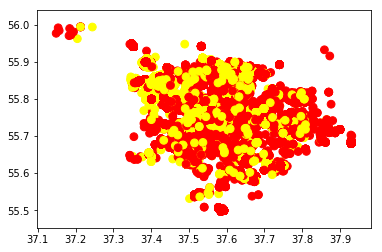

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=60)

# Кластерезация

## Все голоса

In [14]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_scaled = scaler.fit_transform(X)

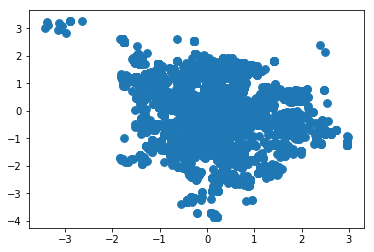

In [27]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=60)

In [28]:
from sklearn.cluster import KMeans

In [31]:
algorithm = KMeans(n_clusters=5)

In [32]:
clusters = algorithm.fit_predict(X_scaled)

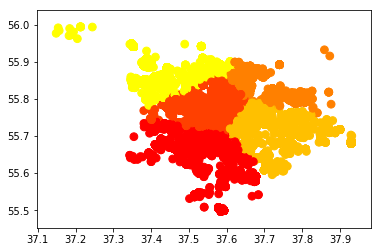

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60)

## За 

In [46]:
X = np.array(data[['x', 'y']][data['comment_class'] == 1])

In [47]:
X_scaled = scaler.fit_transform(X)

In [48]:
clusters = algorithm.fit_predict(X_scaled)

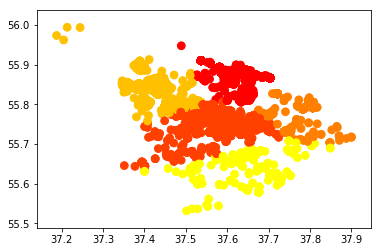

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60)

## Против

In [50]:
X = np.array(data[['x', 'y']][data['comment_class'] == -1])

In [51]:
X_scaled = scaler.fit_transform(X)

In [52]:
clusters = algorithm.fit_predict(X_scaled)

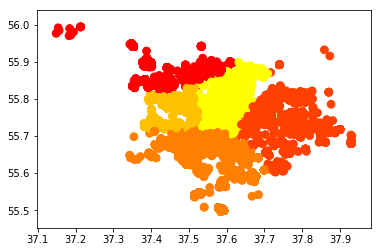

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60)

# Оптимальное число кластеров

In [55]:
X = np.array(data[['x', 'y']])

In [56]:
X_scaled = scaler.fit_transform(X)

In [57]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

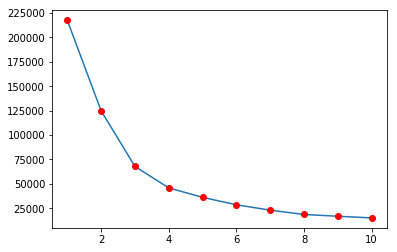

In [58]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

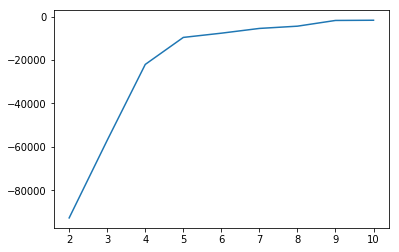

In [59]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

Оптимальное число кластеров 2

In [60]:
algorithm = KMeans(n_clusters=2)

In [61]:
clusters = algorithm.fit_predict(X_scaled)

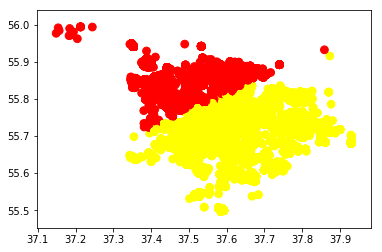

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60)